## Imports

In [6]:
import os
import sys
module_path = os.path.abspath(os.path.join('../regex'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
import re
import helper
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

# Dataframe Reversoes

In [8]:
files = helper.get_files_path("../data/dodfs_txt_barra_n/")
rets_final = helper.extract_multiple(files, "reversoes", True, "../results/")
rets_final

,Tipo do Ato,SEI,Nome,Matricula,Cargo,Classe,Padrao,Quadro,Fundamento Legal,Orgao,Vigencia,Matricula SIAPE
0,Reversão,082.012894/1994,a servidora MARIA HELENA FERNANDES VIANA,60.905-6,Auxiliar de Educacao/Conservacao e Limpeza,Unica,11,Quadro de Pessoal do Distrito Federal,"artigo 34, inciso I, da Lei Complementar no 84...",Distrito Federal,nan,nan
1,Reversão,080.001995/2006,a servidora NILVA DE JESUS MEIRELLES,32.299-7,\nProfessor,A,nan,Quadro de Pessoal do Distrito Federal,"artigo 34, inciso II, da Lei Complementar no 8...",Distrito Federal,nan,nan
2,Reversão,00060-00467506/2018-19,a GUSTAVO CIPRIANO GUIMERANS,154.355-5,Medico -Ginecologia e Obstetricia,Segunda,III,Quadro\nde Pessoal da Secretaria de Estado de ...,"artigo 34, Inciso I e II, da Lei Complementar ...",Secretaria de Estado de Saude do Distrito Fed...,nan,nan
3,Reversão,10.887/2004,a servidora DIRCE MARIA NOGUEIRA DA CRUZ COELHO,159.614-\n4,nan,Segunda,I,Quadro de Pessoal da Secretaria\nde Estado de ...,"artigo 34, Inciso II, da Lei Complementar no 8...",Secretaria\nde Estado de Saude do Distrito Fe...,nan,nan
4,Reversão,00410-00020958/2017-51,a servidora CLAUDIA GLAETE DE ARAUJO DA CRUZ,204.995-3,Professor de Educacao Basica,nan,17,Quadro de Pessoal do Distrito Federal,"artigo 34, inciso I, da Lei Complementar no 84...",Distrito Federal,nan,nan
5,Reversão,080.003053/2007,a servidora ANA PAULA FARIA DOS REIS,38.175-6,Professor,C,nan,Quadro de Pessoal\ndo Distrito Federal,"artigo 34, inciso I, da Lei Complementar no 84...",Distrito Federal,nan,nan
6,Reversão,00052-00002785/2019-31,SIMOES DOS SANTOS,58.462-1,Policia Civil do Distrito Federal,Especial,nan,nan,nan,nan,nan,1409166
7,Reversão,410.000455/2017,servidora SINARA DE CAMPOS SOUZA,300.368-X,Professor de Educacao Basica,nan,23,Quadro de Pessoal do Distrito Federal,"artigo 34, inciso I, da Lei Complementar no 84...",Distrito Federal,nan,nan
8,Reversão,00040-\n00023788/2019-00,a DEIBDIANE GOMES DE MIRANDA CORTE,1.661.756-8,Assistencia Publica a Saude,Terceira,VI,Quadro de Pessoal da Secretaria de Estado de S...,"artigo 34, Inciso I e II, da Lei Complementar ...",Secretaria de Estado de Saude\ndo Distrito Fe...,nan,nan
9,Reversão,00410-00021202/2017-29,a servidora LIANA DA SILVA GAMARRA,205.635-6,Professor de Educacao Basica,nan,15,Quadro de\nPessoal do Distrito Federal,"Artigo 34, inciso II, da Lei Complementar no 8...",Distrito Federal,nan,nan


# Análise

In [9]:
def attribute_stats(name, rets_final):
    presence_name = rets_final[name].value_counts()
    total = rets_final.count()
    labels = ["Com " + name, "Sem " + name]
    size = [total[name] - presence_name[0], presence_name[0]]
    return size, labels

0
0
1
1
2
2
3
3
4
4
5


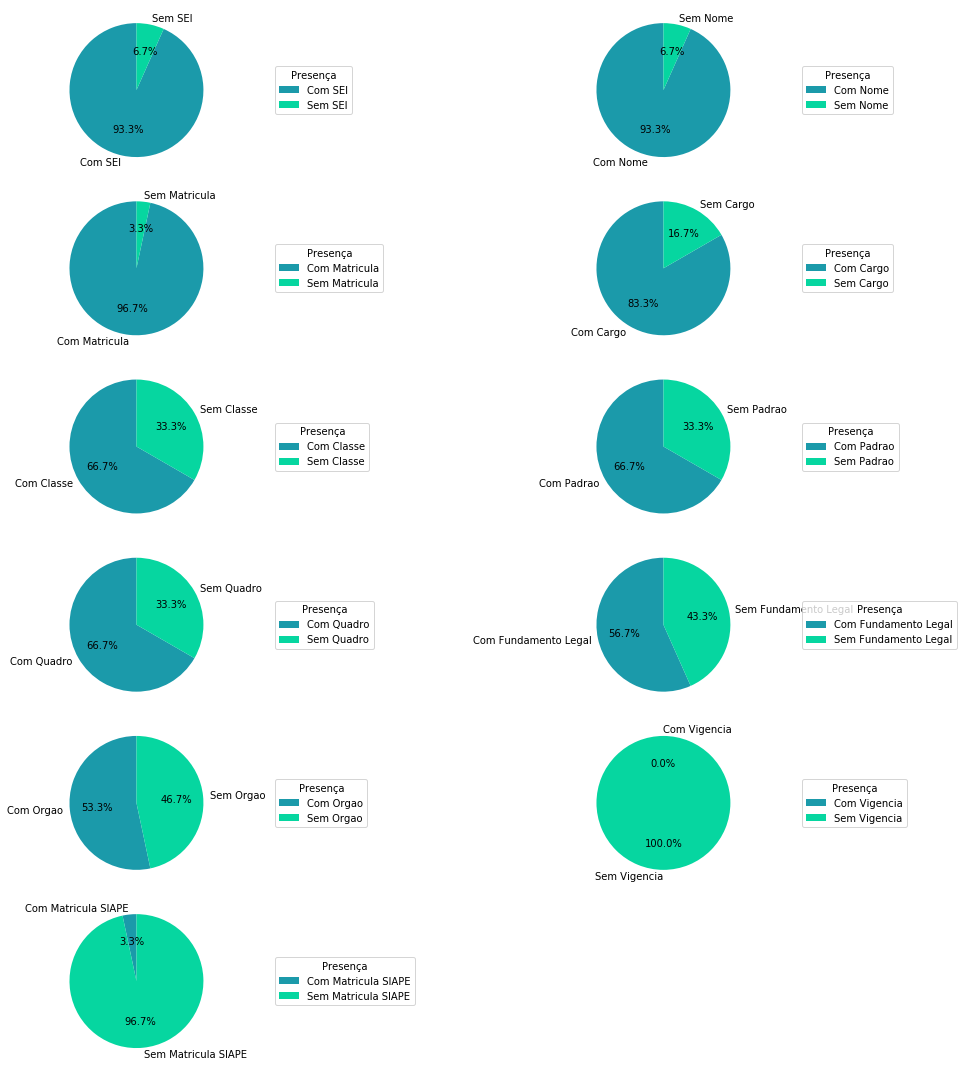

In [10]:

cor = ['#1b9aaa', '#06d6a0']
numb_attr = rets_final.shape[1]-1
grid_square = math.ceil(numb_attr/2)

grid_square = int(grid_square)
_, ax = plt.subplots(grid_square, 2, figsize=(15,15))
names = rets_final.columns[1:]
for i in range(grid_square*2):
    if i < numb_attr:
        size, labels = attribute_stats(names[i], rets_final)
        ax[math.floor(i/2), i%2].pie(size, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
        ax[math.floor(i/2), i%2].legend(labels, title="Presença", loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
    else:
        ax[math.floor(i/2), i%2].axis('off')

plt.tight_layout()
plt.show()